In [4]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#define a linear model function
def f(x, a, b):
    return (a*x + b)
#define an exponential model function
def g(x,a, b):
    return (a*(x**b))

In [6]:
#import data
x, y, x_err, y_err = np.loadtxt("Data.csv", skiprows = 1, delimiter = ',', unpack = True)

In [13]:
# store p_opt and p_cov from the linear fit function
p_optf, p_covf = curve_fit(f, np.log(x), np.log(y), p0 = (1,1),sigma = y_err, absolute_sigma = True)
#store the optimal slope
m_optf = p_optf[0]
#store the optimal b value
b_optf = p_optf[1]

AttributeError: 'float' object has no attribute 'shape'

<ipython-input-70-dab450b20db8>:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x_theof), f(np.log(x_theof), 0.5882, b_optf), color = "green", label = "Theoretical Data")


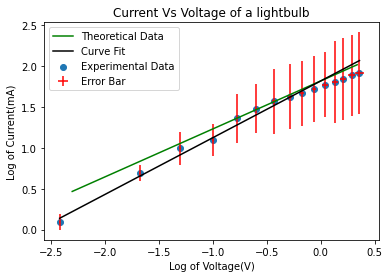

In [70]:
#plot the linear data
plt.scatter(np.log(x), np.log(y), label = "Experimental Data")
plt.ylabel("Log of Current(mA)")
plt.xlabel("Log of Voltage(V)")
plt.title("Current Vs Voltage of a lightbulb")

#make an array for the theoretical x values for the linear function
x_theof = np.zeros(15)

#store theoretical x values for the linear data
for i in range(0,y_theof.size):
    x_theof[i] = i/10

    #plot the theoretical function
plt.plot(np.log(x_theof), f(np.log(x_theof), 0.5882, b_optf), color = "green", label = "Theoretical Data")

#plot the curve fit
plt.plot(np.log(x), f(np.log(x),m_optf, b_optf), color = "black", label = "Curve Fit")

#plot error bars
plt.errorbar(np.log(x), np.log(y),xerr = x_err, yerr = y_err, ls = "none", color = 'red', label = "Error Bar")

#show legend
plt.legend(loc = "upper left")


In [65]:
# store p_opt and p_cov from the exponential fit function
p_optg, p_covg = curve_fit(g, x, y, p0 = (1, .5), sigma = y_err, absolute_sigma = True)
#store the optimal slope
m_optg = p_optg[0]
#store the optimal b value
b_optg = p_optg[1]

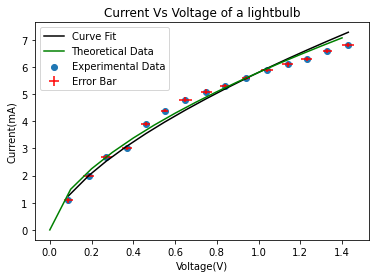

In [66]:
#plot the exponentiol data
plt.scatter(x, y, label = "Experimental Data")
plt.ylabel("Current(mA)")
plt.xlabel("Voltage(V)")
plt.title("Current Vs Voltage of a lightbulb")

#plot the curve fit
plt.plot(x, g(x, m_optg, b_optg), color = "black", label = "Curve Fit")

#create an array for the 
x_theog = np.zeros(15)

#store theoretical x values
for i in range(0,y_theog.size):
    x_theog[i] = i/10

#plot theoretical plot
plt.plot(x_theog, g(x_theog, m_optg, 0.5882), color = "green", label = "Theoretical Data")

#plot error bars
plt.errorbar(x, y ,xerr = x_err/x, yerr = y_err/y, ls = "none",color = 'red', label = "Error Bar")

#show legend
plt.legend(loc = "upper left")

In [71]:
#output the calulated powers for the linear and exponential functions (respectiveley)
m_optf, b_optg

(0.695766546657651, 0.6342692457716765)

[]

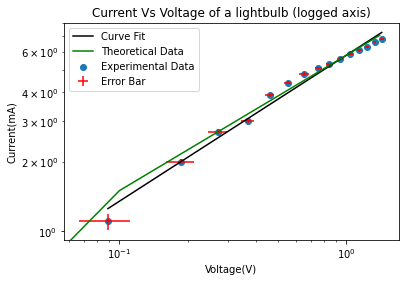

In [72]:
#plot the exponentiol data
plt.scatter(x, y, label = "Experimental Data")
plt.ylabel("Current(mA)")
plt.xlabel("Voltage(V)")
plt.title("Current Vs Voltage of a lightbulb (logged axis)")

#plot the curve fit
plt.plot(x, g(x, m_optg, b_optg), color = "black", label = "Curve Fit")

#creat an array for theoretical x values
x_theog = np.zeros(15)

#store theoretical x values
for i in range(0,y_theog.size):
    x_theog[i] = i/10

#plot theoretical plot
plt.plot(x_theog, g(x_theog, m_optg, 0.5882), color = "green", label = "Theoretical Data")

#plot error bar
plt.errorbar(x, y ,xerr = x_err/x, yerr = y_err/y, ls = "none",color = 'red', label = "Error Bar")

#plot legend
plt.legend(loc = "upper left")

#convert plot to log-log axis
plt.loglog()

In [52]:
#calulate variances for x's and y's of the linear and exponential plots respectively
np.sqrt(p_covf[0,0]), np.sqrt(p_covf[1,1]), np.sqrt(p_covg[0,0]), np.sqrt(p_covg[1,1])

(0.0684425343788415,
 0.11787371172628879,
 0.1335530724472224,
 0.023277942942460193)

In [53]:
#calulate the standard deviation for the exponential and linear y values
np.std(y), np.std(np.log(y))

(1.6957987301956952, 0.49729901342126676)

In [54]:
#define reduced chi squared function
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    ye = f(xi, m, b)
    chi = np.sum(((yi-ye)**2)/(sigma_i**2))
    chi = chi/v
    return chi

In [55]:
#calculate reduced chi squared for linear function
chi1 = chi(x.size, 2, np.log(y),np.log(x) , np.sqrt(y_err)/y, m_optf, b_optf)
chi1

0.591475755118598

In [56]:
#define chi squared function
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    chi = np.sum(((yi-g(xi, m, b))**2)/sigma_i**2)
    chi = chi/v
    return chi

In [57]:
#calculate reduced chi squared for exponential function
chi2 = chi(x.size, 2, y, x , np.sqrt(y_err), m_optg, b_optg)
chi2

0.23098259862670173